In [4]:
#importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r'/content/Autism.csv')
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,0,0,1,1,0,0,1,...,15.599481,m,White-European,yes,no,India,no,12.399055,18 and more,Self
1,2,1,0,0,0,0,0,0,1,0,...,27.181099,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self
2,3,1,1,1,0,1,1,0,1,1,...,31.643906,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self
3,4,0,0,0,0,0,0,0,0,0,...,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self
4,5,0,0,0,1,0,0,0,0,0,...,9.078580,m,?,no,no,Italy,no,7.252028,18 and more,Self


In [6]:
df.shape

(200, 21)

In [7]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation'],
      dtype='object')

In [22]:
#we have a typo in autism column, it should be autism instead of austim
df.rename(columns={'austim':'autism'})
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               200 non-null    int64  
 1   A1_Score         200 non-null    int64  
 2   A2_Score         200 non-null    int64  
 3   A3_Score         200 non-null    int64  
 4   A4_Score         200 non-null    int64  
 5   A5_Score         200 non-null    int64  
 6   A6_Score         200 non-null    int64  
 7   A7_Score         200 non-null    int64  
 8   A8_Score         200 non-null    int64  
 9   A9_Score         200 non-null    int64  
 10  A10_Score        200 non-null    int64  
 11  age              200 non-null    float64
 12  gender           200 non-null    object 
 13  ethnicity        200 non-null    object 
 14  jaundice         200 non-null    int64  
 15  austim           200 non-null    int64  
 16  contry_of_res    200 non-null    object 
 17  used_app_before 

In [24]:
df.isnull().sum()

,0
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,200.0,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
A1_Score,200.0,0.575000,0.495584,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,200.0,0.555000,0.498213,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,200.0,0.475000,0.500628,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,200.0,0.425000,0.495584,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,200.0,0.450000,0.498742,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,200.0,0.340000,0.474898,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,200.0,0.420000,0.494797,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,200.0,0.545000,0.499220,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,200.0,0.540000,0.499648,0.000000,0.000000,1.000000,1.000000,1.000000


In [26]:
#Data Cleaning
df['ethnicity'].value_counts()

,count
ethnicity,
White-European,66
Others,61
Middle Eastern,27
Asian,17
South Asian,9
Pasifika,8
Latino,4
Turkish,3
Black,3


We have some rows with '?' same as null also implies 'others'

In [27]:
df['relation'].value_counts()

,count
relation,
Self,180
Parent,8
Others,8
Relative,2
Health care professional,2


In [13]:
df = df.replace({'yes':1, 'no':2, '?':'Others', 'others':'Others'})

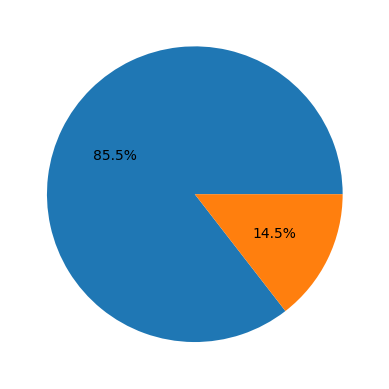

In [29]:
#EDA
plt.pie(df['austim'].value_counts().values, autopct='%1.1f%%')
plt.show()

We can see the dataset is highly imbalanced, currently we'll be using this only for training and if it performs terribly then we'll decide to do something about it

In [15]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation'],
      dtype='object')